In [16]:
import tensorflow as tf
from   tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np 

In [17]:
(x_train ,y_train ) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [18]:
x_train = x_train / 255 
x_test = x_test / 255

In [19]:
x_train_flatterned = x_train.reshape(len(x_train),28*28)
x_test_flatterned = x_test.reshape(len(x_test) , 28 * 28)

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100 , input_shape = (784,) ,activation = "relu"),
    keras.layers.Dense(10 ,activation = "softmax")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(x_train_flatterned , y_train ,epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9226 - loss: 0.2726
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9650 - loss: 0.1196
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9746 - loss: 0.0834
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9807 - loss: 0.0636
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9847 - loss: 0.0498


In [22]:
model.evaluate(x_test_flatterned, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9765 - loss: 0.0786


[0.07861167192459106, 0.9764999747276306]

In [24]:
y_predicted = model.predict(x_test_flatterned)
y_predicted_labels =[np.argmax(i) for i in y_predicted]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [25]:
cm =  tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    1,    0,    0,    1,    1,    3,    1],
       [   0, 1121,    3,    0,    0,    1,    2,    1,    7,    0],
       [   7,    3, 1002,    2,    3,    0,    2,    6,    6,    1],
       [   1,    0,    4,  996,    0,    0,    0,    3,    4,    2],
       [   2,    0,    0,    0,  962,    0,    5,    1,    2,   10],
       [   2,    2,    0,   13,    1,  863,    4,    0,    6,    1],
       [   5,    3,    0,    1,    5,    2,  936,    2,    4,    0],
       [   1,    8,   10,    5,    2,    0,    0,  989,    6,    7],
       [   7,    0,    4,    9,    3,    3,    1,    3,  940,    4],
       [   2,    3,    0,    6,    7,    1,    0,    5,    2,  983]],
      dtype=int32)>

<Axes: >

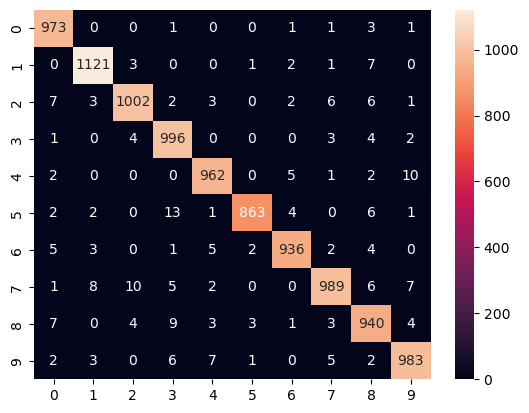

In [26]:
import seaborn as sn
plt.Figure(figsize=(10,7))
sn.heatmap(cm,annot=True , fmt='d')

In [28]:
import pickle 
with open('./model.pickle','wb') as file :
    pickle.dump(model,file)